In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
# Check for missing values in genre
df['listed_in'].isnull().sum()

# View sample genres
df['listed_in'].sample(5)

448                               Dramas, Romantic Movies
1993    Crime TV Shows, International TV Shows, TV Dramas
2117               Comedies, Dramas, International Movies
5885                                          TV Comedies
8709                         Dramas, International Movies
Name: listed_in, dtype: object

In [31]:
# Split the genre strings into lists
df['genres'] = df['listed_in'].str.split(', ')

# Explode the list so each genre has its own row
genre_exploded = df.explode('genres')

# Count the frequency of each genre
genre_counts = genre_exploded['genres'].value_counts()

# Display the top genres
print(genre_counts.head(10))

genres
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


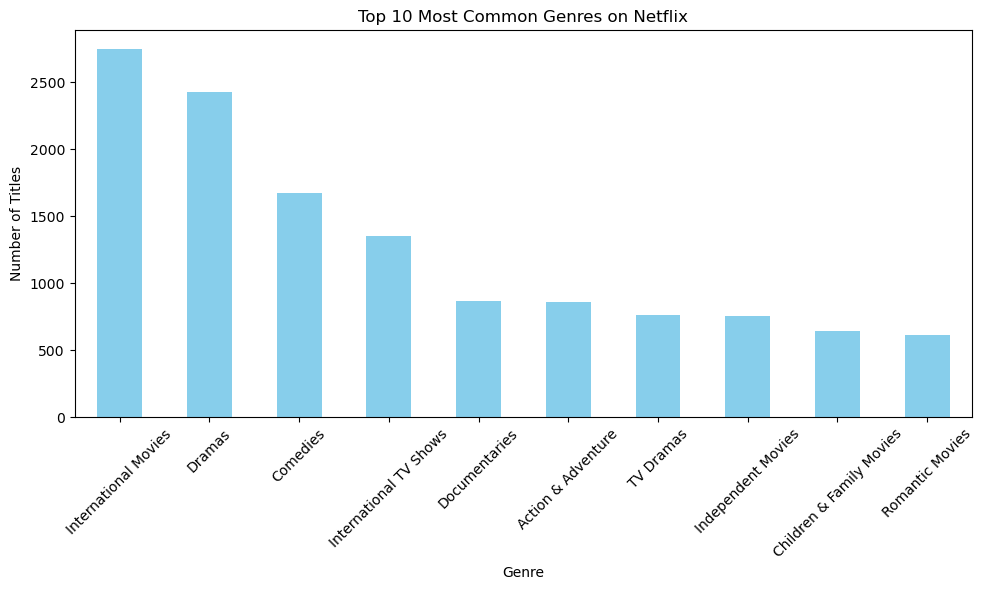

In [33]:
# Plot the top 10 genres
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()